In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

root = 'https://raw.githubusercontent.com/'
repo =  'DataScienceScotland/COVID-19-Management-Information/master/'

targets = ['COVID19%20-%20Daily%20Management%20Information%20-%20Scotland%20-%20Deaths.csv',
           'COVID19%20-%20Daily%20Management%20Information%20-%20Scotland%20-%20Hospital%20care.csv',
           'COVID19%20-%20Daily%20Management%20Information%20-%20Scotland%20-%20Testing.csv'
          ]


fns = [x.split('%20')[-1].lower() for x in targets]


for tgt, fn in zip(targets, fns):
    r = requests.get(root + repo + tgt, 
                     allow_redirects=True)

    with open(fn, 'wb') as fp:
        fp.write(r.content)


In [3]:
print(root + '/' + repo)

https://raw.githubusercontent.com//DataScienceScotland/COVID-19-Management-Information/master/


In [4]:
data = {fn[:-4] : pd.read_csv(fn) for fn in fns}
print(data.keys())

dict_keys(['deaths', 'care', 'testing'])


In [5]:
data['testing'].head()

,Date,Testing - Cumulative people tested for COVID-19 - Negative,Testing - Cumulative people tested for COVID-19 - Positive,Testing - Cumulative people tested for COVID-19 - Total,Testing - New cases reported,Testing - New cases as percentage of people newly tested,Testing - Total number of COVID-19 tests reported by NHS Labs - Daily,Testing - Total number of COVID-19 tests reported by NHS Labs - Cumulative,Testing - Total number of COVID-19 tests reported by UK Gov testing programme - Daily,Testing - Total number of COVID-19 tests reported by UK Gov testing programme - Cumulative,Testing - Total daily tests reported,Testing - Total daily number of positive tests reported,Testing - Test positivity (percent of tests that are positive),Testing - People with first test results in last 7 days,Testing - Positive cases reported in last 7 days,Testing - Tests reported in last 7 days,Testing - Positive tests reported in last 7 days,Testing - Test positivity rate in last 7 days,Testing - Tests in last 7 days per 1000 population
0,2020-03-02,814,1,815,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,914,1,915,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,1043,3,1046,2,0.015267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,1250,6,1256,3,0.014286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,1514,11,1525,5,0.018587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = data['deaths']

total = df.iloc[:,1].values
daily = np.diff(total)
average = np.convolve(daily, np.ones(7)/7)

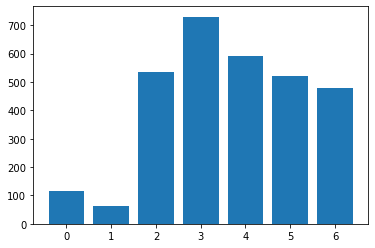

In [35]:
len(daily) % 7
weeks = daily[:-6].reshape((-1,7))
plt.bar(np.arange(7), weeks.sum(axis=0));

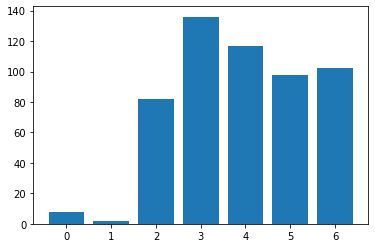

In [41]:
plt.bar(np.arange(7), weeks[20:,:].sum(axis=0));

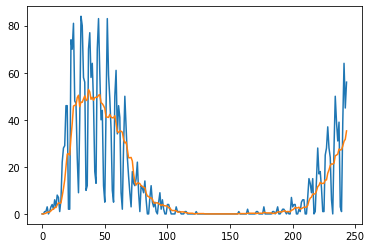

In [6]:
plt.plot(daily)
plt.plot(average[:-6]);

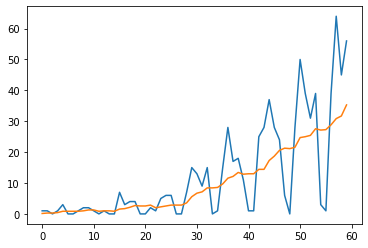

In [8]:
start = -60
plt.plot(daily[start :])
plt.plot(average[start - 6:-6]);

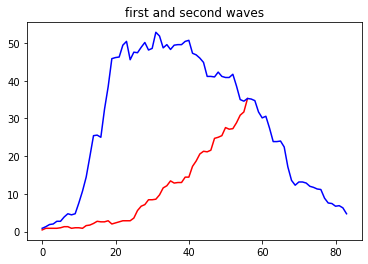

In [25]:
plt.plot(average[187:-6],'r')
plt.plot(average[6:90], 'b')
plt.title('first and second waves');

In [9]:
np.where(average ==0 )

(array([  0,   1, 122, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156]),)

In [11]:
from scipy import stats


YY = np.log(average.tolist())

sx, window = 157, 40
sy = 240
M  = np.zeros(( window, 250 - sy))

for i, x in enumerate(range(sx, sx+window)):
    for j, y in enumerate(range(sy, 250)):
        Y = YY[x:y]
        X = np.arange(y-x)
        M[i,j] = stats.linregress(X,Y).rvalue

<ipython-input-11-b7b6a36d7a3c>:4: RuntimeWarning: divide by zero encountered in log
  YY = np.log(average.tolist())


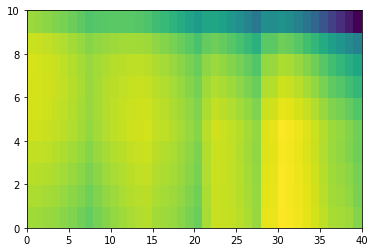

In [12]:
plt.pcolor(M.T)

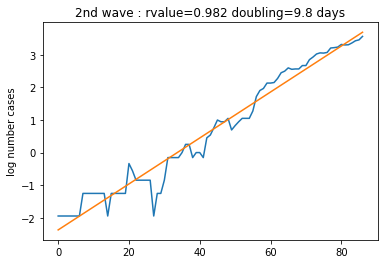

In [15]:

Y = np.log(average[157:-6])
X = np.arange(len(Y))

plt.plot(X,Y)

coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept

plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('2nd wave : rvalue={:.3} doubling={:.1f} days'.format(coeffs.rvalue, np.log(2)/a) )

plt.ylabel('log number cases');

In [43]:
pwd

'/home/macbuse/Documents'

In [18]:
total[-1] - total[156]

753

In [42]:
! ../.g

[master 4e09048] web
 5 files changed, 1308 insertions(+), 15 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/scot_covid-checkpoint.ipynb
 create mode 100644 PROG/care.csv
 create mode 100644 PROG/deaths.csv
 create mode 100644 PROG/testing.csv
Counting objects: 8, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 38.00 KiB | 5.43 MiB/s, done.
Total 8 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   d26a903..4e09048  master -> master
